# Chapter 8: Tree-Based Methods
- **Chapter 8 from the book [An Introduction to Statistical Learning](https://www.statlearning.com/)**
- **By Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani**
- **Pages from $332$ to $333$**
- **By [Mosta Ashour](https://www.linkedin.com/in/mosta-ashour/)**


**Exercises:**
- **[1.](#1)**
- **[2.](#2)**
- **[3.](#3)**
- **[4.](#4) [(a)](#4a) [(b)](#4b)**
- **[5.](#5)**
- **[6.](#6)**

# <span style="font-family:cursive;color:#0071bb;"> 8.4 Exercises </span>
## <span style="font-family:cursive;color:#0071bb;"> Conceptual </span>

<a id='1'></a>
### $1.$ Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1, R_2, \dots,$ the cutpoints $t_1, t_2, \dots,$ and so forth.
### *Hint: Your result should look something like Figures $8.1$ and $8.2$.*

![title](img/ch8_1.png)

<a id='2'></a>
### $2.$ It is mentioned in Section $8.2.3$ that boosting using depth-one trees (or *stumps*) leads to an *additive* model: that is, a model of the form

$$f(X) = \sum_{j=1}^{p}{f_j(X_j)}$$

### Explain why this is the case. You can begin with $(8.12)$ in Algorithm $8.2$.

**Answer:**
>- Boosting has three tuning parameters which the third one is: the number $d$ of splits in each tree, which controls the complexity of the boosted ensemble.
>- When $d = 1$, each tree is a *stump*, consisting of a *single split*.
>- In this case, the boosted ensemble is fitting an additive model, since each term involves only a single variable.
>- With this setting the Boosting for Regression Trees algorithm becomes:
>  1. Set $\hat{f}(x) = 0$ and $r_i = y_i$ for all $i$ in training set.
>  2. For $b = 1, 2, ..., B,$ repeat:<p>
>  $(a)$ Fit a tree $\hat{f^b}$ with **1** split to the training data $(X, r)$.<p>
>  $(b)$ Update $\hat{f}$ by adding the new tree:<p>
>  $$\hat{f}(x) \leftarrow \hat{f}(x) + \hat{f}^b(X_j)$$ <p> **Note:** it can't be shrunken because it is already as small as it can possibly be, also note that it is a function of a single variable.<p>
>  $(c)$ Update the residuals,
>  $$r_i \leftarrow r_i - \hat{f}^b(X_j)$$
>  3. Output the boosted model,
$$\hat{f}(x) = \sum_{b=1}^{B}{\hat{f}^b(X_j)}$$
>- Because the model is using depth-one trees, each $\hat{f}^b$ generated in step $2$ is a function of a single feature $\hat{f}^b(X_j)$ and so the model output in step $3$ is a sum of functions of a given single variable which is presented as the additive model.

<a id='3'></a>
### 3. Consider the Gini index, classification error, and cross-entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The $x$-axis should display $\hat{p}_{m1}$, ranging from $0$ to $1$, and the $y$-axis should display the value of the Gini index, classification error, and entropy.

### *Hint: In a setting with two classes, $\hat{p}_{m1} = 1 - \hat{p}_{m2}$. You could make this plot by hand, but it will be much easier to make in R.*

**Answer:**
- Recall these settings from the book page $312$. For $k= \{1,2\}$:

>- $\text{Classification Error}:$
>  $$ \begin{align}
E &= 1 - \mathop{max}_k(\hat{p}_{mk}) \tag{8.5}\\
  &= 1 - \mathop{max}_k\{\hat{p}_{m1}, \hat{p}_{m2}\}
\end{align}$$

>- $\text{Gini Index}:$
>  $$ \begin{align}
G &= \sum_{k=1}^K \hat{p}_{mk}(1 - \hat{p}_{mk}), \tag{8.6}\\
  &= \hat{p}_{m1}(1 - \hat{p}_{m1}) + \hat{p}_{m2}(1 - \hat{p}_{m2})
\end{align}$$

>- $\text{Entropy}:$
>  $$ \begin{align}
D &= - \sum_{k=1}^K \hat{p}_{mk} log \hat{p}_{mk}. \tag{8.7}\\
  &= - \hat{p}_{m1} log \hat{p}_{m1} - \hat{p}_{m2} log \hat{p}_{m2}
\end{align}$$

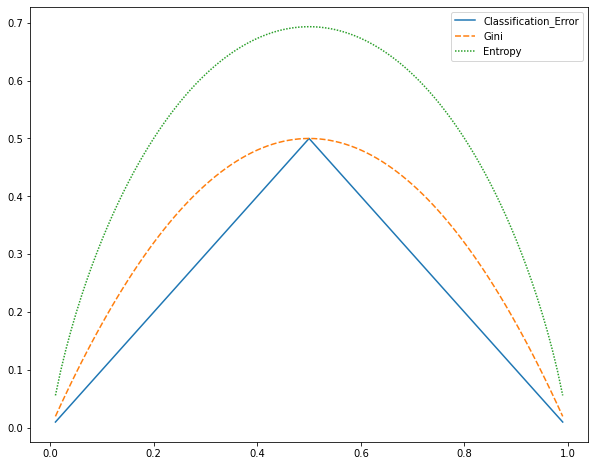

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pm1 = np.arange(0.01, 1, 0.01)
pm2 = 1 - pm1

# Classification Error:
clf_err = 1 - np.maximum(pm1, pm2)

# Gini:
gini = (pm1 * (1 - pm1)) + (pm2 * (1 - pm2))

# Entropy:
entropy = - (pm1 * np.log(pm1)) - (pm2 * np.log(pm2))

# dataframe
df = pd.DataFrame({'Classification_Error': clf_err,
                   'Gini': gini,
                   'Entropy': entropy}).set_index(pm1)

plt.figure(figsize=(10, 8))
sns.lineplot(data=df);

<a id='4'></a>
### $4.$ This question relates to the plots in Figure $8.12$.

<a id='4a'></a>
**$(a)$ Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure $8.12$. The numbers inside the boxes indicate the mean of $Y$ within each region.**

<a id='4b'></a>
**$(b)$ Create a diagram similar to the left-hand panel of Figure $8.12$, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.**

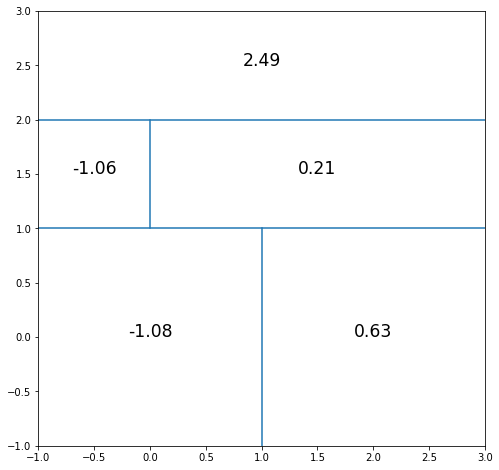

In [2]:
# dividing up the predictor space into regions
plt.figure(figsize=(8, 8))
plt.xlim([-1, 3])
plt.ylim([-1, 3])

plt.axhline(1)
plt.axhline(2)
plt.axvline(1, ymax=.5)
plt.axvline(0, ymin=.5, ymax=.75)

# plot the mean for each region
means = {'-1.08': (0, 0),
         '0.63': (2, 0),
         '-1.06': (-0.5, 1.5),
         '0.21': (1.5, 1.5),
         '2.49': (1, 2.5)}

for k, (p1, p2) in means.items():
    plt.text(p1, p2, k, fontsize='xx-large', ha='center');

<a id='5'></a>
### $5.$ Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $\text{P(Class is Red|X)}$: <p> $$0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, \text{and } 0.75.$$ <p> There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [3]:
res = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

# Majority vote approach
majority = (0.5 < res).sum()

# The average Probability
average = np.mean(res)

print(f'Is red (by Majority): {majority > .5}, majority = {majority}')
print(f'Is red (by Average) : {average  > .5}, avg = {average}')

Is red (by Majority): True, majority = 6
Is red (by Average) : False, avg = 0.45


<a id='6'></a>
### $6.$ Provide a detailed explanation of the algorithm that is used to fit a regression tree.
**Answer:**
> The Regression Tree algorithm is shown as Algorithm  $8.1$  in the book. The algorithm is all about building a single tree for predictors, therefore we tend to select the best individual tree by applying **cost complexity pruning** and **K-fold cross-validation** to choose the best $\alpha$. <p> It requires $4$ steps to build a Regression Tree, as shown in Algorithm $8.1$:
    
> $\text{Step 1:}$ Use **recursive binary splitting** to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.
>- We take a top-down, greedy approach that is known as **recursive binary splitting**. The approach is *top-down* because it begins at the top of the tree (at which point all observations belong to a single region) and then successively splits the predictor space; each split is indicated via two new branches further down on the tree. It is *greedy* because at each step of the tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.
>- We first select the predictor $X_j$ and the cutpoint $s$ such that splitting the predictor space into the regions $\{X|X_j < s\}$ and $\{X|X_j \geq s\}$ leads to the greatest possible
reduction in $\text{RSS}$, and then choose the predictor and cutpoint such that the resulting tree has the lowest $\text{RSS}$.
>- Next, we repeat the process, looking for the best predictor and best cutpoint in order to split the data further so as to minimize the $\text{RSS}$ within each of the resulting regions. 
>- However, this time, instead of splitting the entire predictor space, we split one of the two previously identified regions.
>- We now have three regions. Again, we look to split one of these three regions further, so as to minimize the $\text{RSS}$. The process continues until a stopping criterion is reached; for instance, we may continue until no region contains more than five observations "as in Figure $8.3$".
>- Once the regions $R_1, \dots , R_J$ have been created, we predict the response for a given test observation using the mean of the training observations in the region to which that test observation belongs.
>- And finally, this process may produce good predictions on the training set, but is likely to **overfit** the data, leading to poor test set performance.

> $\text{Step 2:}$ Apply **cost complexity pruning** to the large tree in order to obtain a sequence of best subtrees, as a function of $\alpha$.
>- One possible strategy is that we can build the tree only so long as the decrease in the $\text{RSS}$ due to each split exceeds some (high) threshold.
>- Therefore, a better strategy is to grow a very large tree $T_0$, and then $\text{prune}$ it back in order to obtain a $\text{subtree}$.
>- To select a subtree with the lowest test error rate, we can estimate its test error using cross-validation or the validation set approach. But estimating the CV error for every possible subtree would be computationally expensive "Cumbersome".
>- So, Cost $\text{complexity pruning}$ also known as $\text{weakest link pruning}$ gives us a way to do just this. Rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$.
>- For each value of α there corresponds a subtree $T \subset T_0$ is as small as possible such that
$$
\sum_{m=1}^{|T|} \sum_{i: x_i \in R_m} (y_i - \hat{y}_{Rm})^2 + \alpha |T|  \tag{8.4}
$$
>- Here the tuning parameter $\alpha$ controls a trade-off between the subtree's complexity and its fit to the training data. 
>  - **Quick reminder:** (Equation $(8.4)$ is a similar $\text{cost + penalty}$ format as regularization methods as the **lasso** $(6.7)$ from Chapter $6$, in which a similar formulation was used in order to control the complexity of a linear model.)
>- When $\alpha$ = 0, then the subtree $T$ will simply equal to $T_0$, because then $(8.4)$ just measures the training error "cost". 
>- As we start to increase $\alpha$, branches get pruned from the tree in a nested and predictable fashion, so obtaining the whole sequence of subtrees as a function of $\alpha$ is easy.

> $\text{Step 3:}$ We can select a value of $\alpha$ using a **validation set** or using **cross-validation**. We then return to the full data set and obtain the subtree corresponding to $\alpha$ as following.
>- Use **K-fold cross-validation** to choose $\alpha$. That is, divide the training observations into $K$ folds. For each $k = 1, \dots ,K$:
>  - $(a)$ Repeat Steps $1$ and $2$ on all but the $k$th fold of the training data.
>  - $(b)$ Evaluate the mean squared prediction error on the data in the left-out $k$th fold, as a function of $\alpha$. Average the results for each value of $\alpha$, and pick $\alpha$ to minimize the average error.

> $\text{Step 4:}$ Return the subtree from Step $2$ that corresponds to the chosen value of $\alpha$, re-fit a regression tree on the full dataset to obtain the subtree, and use this final form for prediction.

# Done!